# EDA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Funciones y dataset a utilizar 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display, HTML
from scipy.ndimage import shift
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
x_train = np.load("/content/drive/MyDrive/Facultad - Enrique Irigoyen/Redes Neuronales/TP1-RN/fashion-mnist-itba-lab-2023q1/train_images.npy")
y_trainDF = pd.read_csv("/content/drive/MyDrive/Facultad - Enrique Irigoyen/Redes Neuronales/TP1-RN/fashion-mnist-itba-lab-2023q1/train_labels.csv")
y_train = y_trainDF.values

Separacion de clases para poder hacer una analisis del dataset.

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=50)

y_train_categorical = to_categorical(Y_train)
y_val_categorical = to_categorical(Y_val)

# Get the unique categories
unique_categories = np.unique(y_train)

# Create a dictionary to store the datasets
datasets = {}

# Split the images into separate datasets based on categories
for category in unique_categories:
    # Find the indices of images belonging to the current category
    indices = np.where(y_train == category)[0]
    
    # Extract the images for the current category
    category_images = x_train[indices]
    
    # Add the category images to the datasets dictionary
    datasets[category] = category_images

datasets.keys()


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Histograma de distribucion de clases.

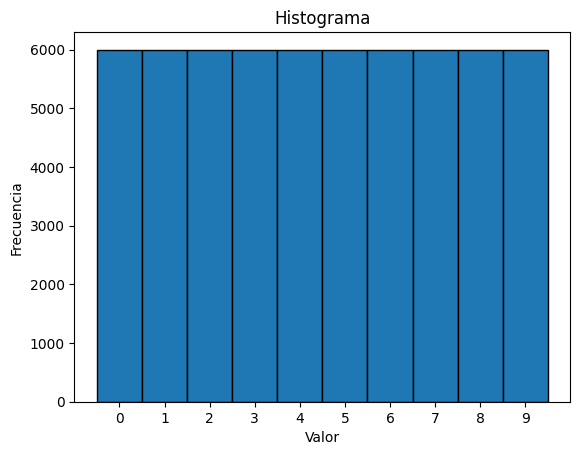

In [6]:
plt.hist(y_train, bins=10, range=(-0.5, 9.5), edgecolor='black',align='mid')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.xticks(np.arange(0, 10, 1))
plt.show()

Muestreo de una imagen de cada clase.

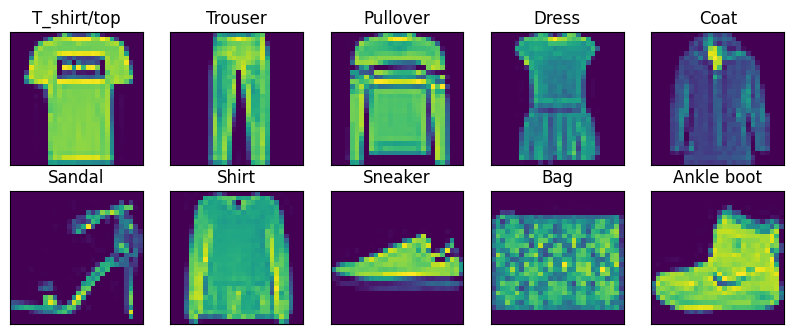

In [7]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(datasets[i][0])
    plt.title(class_names[i])
plt.show()

# Modelos


## Dataset e imports

In [8]:
x_train = np.load("/content/drive/MyDrive/Facultad - Enrique Irigoyen/Redes Neuronales/TP1-RN/fashion-mnist-itba-lab-2023q1/train_images.npy")
y_trainDF = pd.read_csv("/content/drive/MyDrive/Facultad - Enrique Irigoyen/Redes Neuronales/TP1-RN/fashion-mnist-itba-lab-2023q1/train_labels.csv")
y_train = y_trainDF.values
y_train_sparse = to_categorical(y_train)

Separacion de dataset para validacion y data augmentation.

In [32]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=50)

# Data augmentation espejando las imagenes.
def flip(image):
    image = image
    flipped_image = np.fliplr(image)
    return flipped_image

X_train_aug = [image for image in X_train]
Y_train_aug = [label for label in Y_train]

for image, label in zip(X_train, Y_train):
    X_train_aug.append(flip(image))
    Y_train_aug.append(label)
    

# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X_train_aug))
X_train_shuff = np.array(X_train_aug)[shuffle_idx]
Y_train_shuff = np.array(Y_train_aug)[shuffle_idx]


In [33]:
y_val = Y_val
Y_val = to_categorical(Y_val)
Y_train_shuff = to_categorical(Y_train_shuff)

In [11]:
from tensorflow.keras.layers import Dense, Flatten ,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adamax,Nadam
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import sys


## Modelo 1 : Regresion SOFTMAX


In [ ]:
##Funcion para generar los modelos.
def get_model_regresion_softmax(batch_norm=0 , optimizer ='adam',metrics =["accuracy"] ):
    oldstdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')

    model =  Sequential()
    model.add(Flatten(input_shape=(28,28)))
    if(batch_norm == 1):
        model.add(BatchNormalization())
    model.add(Dense(10, activation="softmax"))
    model.summary()
    model.compile(loss = "categorical_crossentropy", optimizer=optimizer ,metrics=metrics )

    sys.stdout = oldstdout
    return model

escb = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
)

In [ ]:
#Modelo 1 : optimizador Adam, batch normalization y metrica principal accuracy.
modelo1 = get_model_regresion_softmax(batch_norm = 1)
history1 = modelo1.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 64, epochs=200,callbacks=[escb,],verbose=0)


#Modelo 2 : optimizador SGD, batch normalization y metrica principal accuracy.
modelo2 = get_model_regresion_softmax(batch_norm = 1,optimizer = SGD(1e-3))
history2 = modelo2.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 64, epochs=200,callbacks=[escb,],verbose=0)

#Modelo 3 : optimizador Adam, sin batch normalization y metrica principal accuracy.
modelo3 = get_model_regresion_softmax()
history3 = modelo3.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 64, epochs=200,callbacks=[escb,],verbose=0)



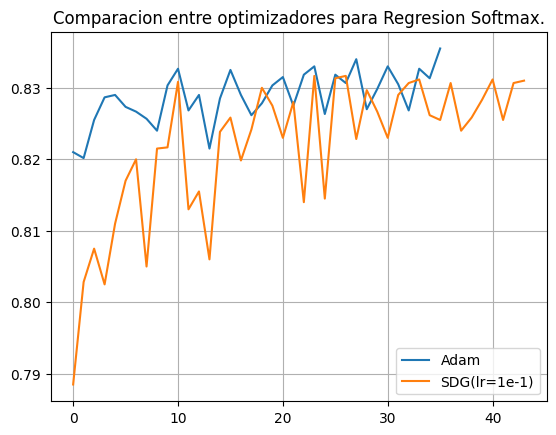

In [ ]:
#Graficamos el accuracy entre dos optimizadores.
val_acc1 = history1.history["val_accuracy"]
val_acc2 = history2.history["val_accuracy"]

plt.plot(val_acc1, label="Adam")
plt.plot(val_acc2, label="SDG(lr=1e-1)")
plt.title("Comparacion entre optimizadores para Regresion Softmax.")
plt.legend()
plt.grid()
plt.show()



Como vemos, la unica diferencia que podemos notar entre estos dos optimizadores al hacer regresion softmax es el ruido, ya que utilizando un learning rate(LR) fijo con SGD tenemos mucho mas ruido que al utilizar adam donde el LR es variable. Debido a esta caracteristica, se continuara utilizando el optimizador Adam.


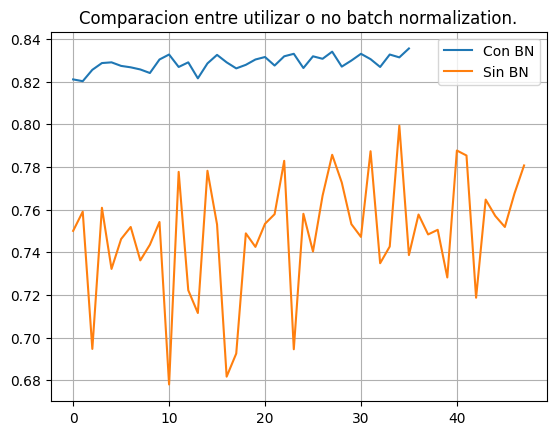

In [ ]:
#Graficamos el accuracy entre utilizar o no Batch normalization.
val_acc1 = history1.history["val_accuracy"]
val_acc3 = history3.history["val_accuracy"]

plt.plot(val_acc1, label="Con BN")
plt.plot(val_acc3, label="Sin BN")
plt.title("Comparacion entre utilizar o no batch normalization.")
plt.legend()
plt.grid()
plt.show()

En esta comparacion podemos observar una gran diferencia entre la utilizacion de batch normalization o no, por lo que de ahora en mas siempre sera utilizada en los siguientes modelos. Esto se hace para normalizar los datos de entrada, y asi no tener diferencia en ordenes de magnitud entre los parametros con los que trabajamos, ya que en caso de no hacerlo los parametros que tengan mayores valores nos afectarian mas en el entrenamiento.

In [ ]:
# Comparacion entre batch sizes.
epochs = 200
accuracys = np.zeros((6,epochs))
batch_sizes=[32,64  , 256 , 512 ,2048 , 4096  ]
for idx,BS in enumerate(batch_sizes) :
  modelo = get_model_regresion_softmax(batch_norm = 1)
  historial = modelo.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = BS, epochs=epochs,callbacks=[escb,],verbose=0)
 
  accuracys[idx,:] = np.pad(historial.history['val_accuracy'],(0,epochs - len(historial.history['val_accuracy'])),mode='constant')


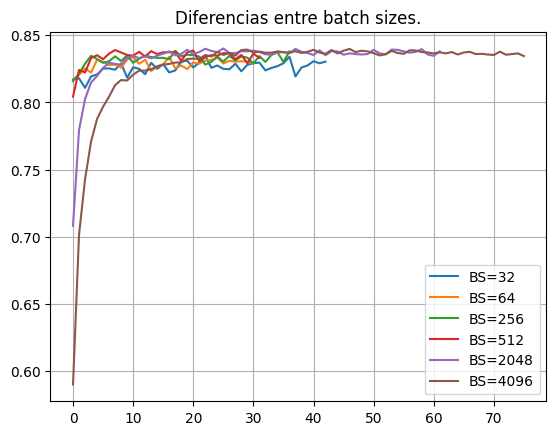

In [ ]:
for idx,BS in enumerate(batch_sizes) :
  mod =list(filter(lambda x: x !=0, list(accuracys[idx])))
  plt.plot(mod, label='BS='+str(BS))
plt.title("Diferencias entre batch sizes.")
plt.legend()
plt.grid()
plt.show()

Como se puede ver, cuanto menor es el batch size mas ruido se tiene. Por lo que se puede apreciar los que la relacion ruido/accuracy es mejor es con los BS intermedios/altos. En adelante, se continuara utilizando un batch size de 256 ya que por lo observado se considera un equilibrio entre la variabilidad de un BS muy chico, y los problemas que puede tener para generalizar la red si se utiliza un BS muy grande ( donde tambien se ve que el accuracy se mantiene bastante constante).

### Analisis metricas secundarias

Analisis de area bajo la curva ROC y su grafica.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

predictions_train = modelo.predict(X_train)
predictions_val= modelo.predict(X_val)


188/188 [==============================] - 0s 1ms/step


In [ ]:
# AREA BAJO LA CURVA ROC
print(" El area bajo la curva ROC para train es de ")
print(roc_auc_score(Y_train, predictions_train, average='macro',multi_class='ovr'))
print(" El area bajo la curva ROC para validacion es de ")
print( roc_auc_score(Y_val, predictions_val, average='macro',multi_class='ovr'))

 El area bajo la curva ROC para train es de 
0.9849321589194272
 El area bajo la curva ROC para validacion es de 
0.9834152337689721


<ipython-input-58-43d139b86db3>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


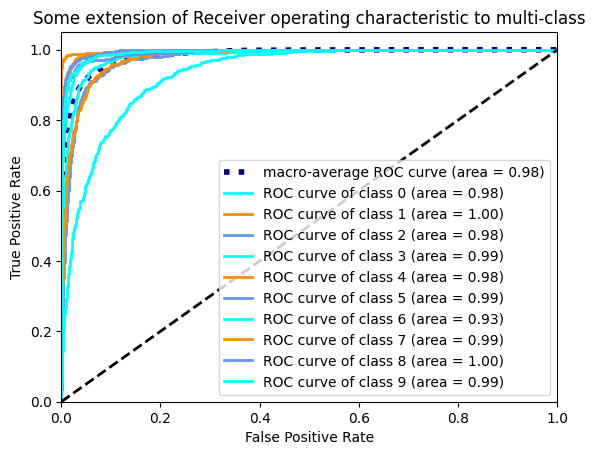

In [ ]:
# CURVA ROC ( TOMADO DEL MATERIAL DE LA CATEDRA)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = Y_val.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], predictions_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), predictions_val.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


from matplotlib import pyplot as plt
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Metricas secundarias : f1-score, precision y recall.

In [ ]:
import tensorflow as tf
metric = tf.keras.metrics.Precision(thresholds=0.5)
metric.update_state(Y_val, predictions_val)
presicion = metric.result()
print("precision : " + str(presicion.numpy()))

metric = tf.keras.metrics.Recall(thresholds=0.5)
metric.update_state(Y_val, predictions_val)
recall = metric.result()
print("recall : " + str(recall.numpy()))

f1_Score=(2*(presicion*recall))/(presicion+recall)
print("f1 score: " + str(f1_Score.numpy()))







precision : 0.8703503
recall : 0.80333334
f1 score: 0.8355001


En el caso de estas metricas, se utilizo el macro-average. La diferencia entre el utilizado y el micro, es que en el macro se calcula el score de cada clase y luego se promedia a comparacion del micro donde se suman y luego se calcula el score.
Micro le da distinto peso a las clases, ya que si hay mas de una clase que en otra en el promedio va a pesar mas. En cambio la macro al calcular una medida por clase y luego promediar, les va a dar la misma importancia a todas las clases.
Para este problema se adopto el macro-average, ya que ninguna clase tiene mas importancia que otra en nuestro caso.

## Modelo 2 : MLP

In [ ]:
#funcion para generar los modelos de MLP.
def get_model_mlp( optimizer ='adam',metrics =["accuracy"],h_layers = [1024,200] , activation = 'relu' ,dropout=0 ):
    oldstdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')

    model =  Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(BatchNormalization())
    
    for idx,hl in enumerate (h_layers):
      model.add(Dense(hl, activation=activation))
      if(dropout>0):
        model.add(Dropout(dropout))
 
    model.add(Dense(10, activation="softmax"))
    model.summary()
    model.compile(loss = "categorical_crossentropy", optimizer=optimizer ,metrics=metrics )

    sys.stdout = oldstdout
    return model

escb = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
)

**Analisis** : Para este modelo de MLP se van a ir comparando distintos modelos hasta poder llegar al optimo. Como base por lo visto en la regresion softmax, siempre se va a utilizar batch normalization. Tambien se va a utilizar el optimizador adam.
A partir de esta comparacion se van a definir la cantidad y el tamaño de capas para poder realizar un analisis exhaustivo sobre la red.
Como metrica de comparacion utilizaremos el accuracy.

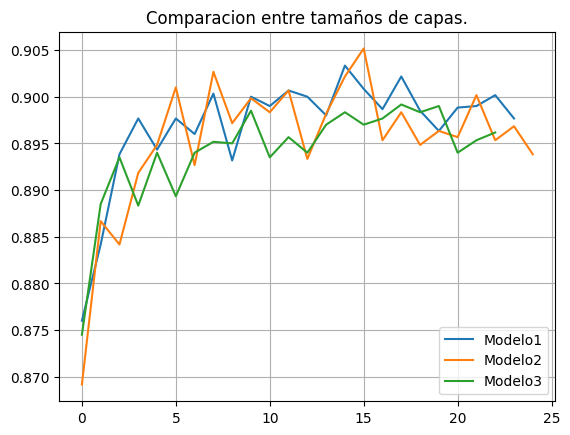

In [ ]:
#Comparacion de tamaño de capas(solo se mencionan las hidden layers).
  #Modelo 1 : 2 capas ocultas de tamaño h_layers = [1024,200].
modelo1 = get_model_mlp()
history1 = modelo1.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)

  #Modelo 2 : 2 capas ocultas de tamaño h_layers = [1024,1024].
modelo2 = get_model_mlp(h_layers=[1024,1024])
history2 = modelo2.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)

#Modelo 3 : 2 capas ocultas de tamaño h_layers = [200,1024].
modelo3 = get_model_mlp(h_layers=[200,1024])
history3 = modelo3.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)


plt.plot(history1.history["val_accuracy"], label="Modelo1")
plt.plot(history2.history["val_accuracy"], label="Modelo2")
plt.plot(history3.history["val_accuracy"], label="Modelo3")
plt.title("Comparacion entre tamaños de capas.")
plt.legend()
plt.grid()
plt.show()


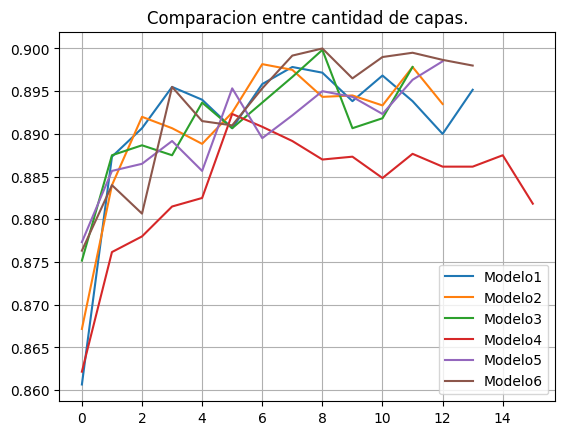

In [ ]:
#Comparacion de cantidad de capas(solo se mencionan las hidden layers).
  #Modelo 1 : 2 capas ocultas .
modelo1 = get_model_mlp(h_layers=[200,1024])
history1 = modelo1.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)

  #Modelo 2 : 3 capas ocultas .
modelo2 = get_model_mlp(h_layers=[200,500,1024])
history2 = modelo2.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)

  #Modelo 3 : 4 capas ocultas .
modelo3 = get_model_mlp(h_layers=[200,500,700,1024])
history3 = modelo3.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)

  #Modelo 4 : 6 capas ocultas .
modelo4 = get_model_mlp(h_layers=[50,200,400,600,900,1024])
history4 = modelo4.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)

  #Modelo 5 : 2 capas ocultas .
modelo5 = get_model_mlp(h_layers=[1024,200])
history5 = modelo5.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)

  #Modelo 6 : 3 capas ocultas .
modelo6 = get_model_mlp(h_layers=[1024,500,200])
history6 = modelo6.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)

plt.plot(history1.history["val_accuracy"], label="Modelo1")
plt.plot(history2.history["val_accuracy"], label="Modelo2")
plt.plot(history3.history["val_accuracy"], label="Modelo3")
plt.plot(history4.history["val_accuracy"], label="Modelo4")
plt.plot(history5.history["val_accuracy"], label="Modelo5")
plt.plot(history6.history["val_accuracy"], label="Modelo6")
plt.title("Comparacion entre cantidad de capas.")
plt.legend()
plt.grid()
plt.show()

A partir de las comparaciones anteriores y teniendo en cuenta que no queremos una red muy grande para hacer el analisis a continuacion, vemos que utilizando una red donde los tamaños de las capas tienen tamaños en orden decreciente (1024 la primera y luego 200)obtenemos un buen resultado de nuestra metrica de interes y con dos capas ocultas ya podemos obtener buenos resultados sin necesidad de tener una red demasiado grande siendo que lo que nos importa en este analisis es ir cambiando parametros de la red y ver lo que sucede y no maximizar el accuracy.

A partir de este modelo se continuaran los analisis del accuracy y las iteraciones en funcion de los siguientes parametros : 
- learning rate
- batch size
- optimizadores
- funciones de activacion 
- dropout rate 
- inicializaciones de pesos

In [ ]:
#generador de modelos para el analisis exhaustivo.
def get_model_mlp_analisis(BN=1,initializer = 'glorot_uniform', optimizer ='adam',metrics =["accuracy"],h_layers = [1024,200] , activation = 'relu' ,dropout=0 ,loss= "categorical_crossentropy"):
    oldstdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')

    model =  Sequential()
    model.add(Flatten(input_shape=(28,28)))
    if(BN==1):
      model.add(BatchNormalization())
    
    for idx,hl in enumerate (h_layers):
      model.add(Dense(hl, activation=activation, kernel_initializer = initializer))
      if(dropout>0):
        model.add(Dropout(dropout))
 
    model.add(Dense(10, activation="softmax"))
    model.summary()
    model.compile(loss = loss, optimizer=optimizer ,metrics=metrics )

    sys.stdout = oldstdout
    return model

escb = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
)

In [ ]:
#Comparacion de learning rate para el optimizador Adam.
  #Modelo 1 : lr=0.001 por default.
modelolr1 = get_model_mlp_analisis() 
historylr1 = modelolr1.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 2 : lr x 5
modelolr2 = get_model_mlp_analisis(optimizer = Adam(learning_rate=0.01))
historylr2 = modelolr2.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 3 : lr x 10 .
modelolr3 = get_model_mlp_analisis(optimizer = Adam(learning_rate=0.02))
historylr3 = modelolr3.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 4 : lr / 10 .
modelolr4 = get_model_mlp_analisis(optimizer = Adam(learning_rate=0.0001))
historylr4 = modelolr4.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)


,lr=1e-3,lr=1e-2,lr=1e-1,lr=1e-4
Max Accuracy,0.900167,0.895167,0.882833,0.902667
# Iteraciones,12.000000,13.000000,11.000000,16.000000


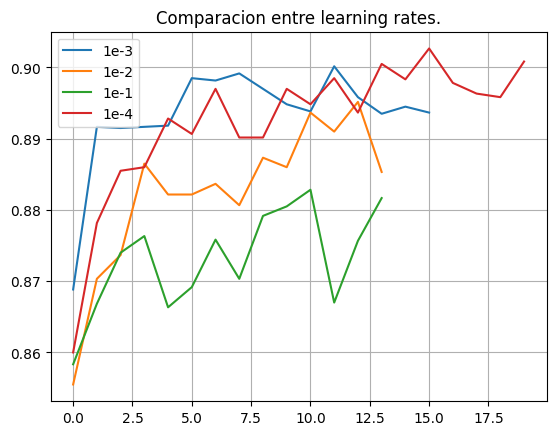

In [ ]:
tabla = [['Max Accuracy',],[' # Iteraciones',]]
epochs = 200
accuracys = np.zeros((4,200))

accuracys[0,:] = np.pad(historylr1.history['val_accuracy'],(0,epochs - len(historylr1.history['val_accuracy'])),mode='constant')
accuracys[1,:] = np.pad(historylr2.history['val_accuracy'],(0,epochs - len(historylr2.history['val_accuracy'])),mode='constant')
accuracys[2,:] = np.pad(historylr3.history['val_accuracy'],(0,epochs - len(historylr3.history['val_accuracy'])),mode='constant')
accuracys[3,:] = np.pad(historylr4.history['val_accuracy'],(0,epochs - len(historylr4.history['val_accuracy'])),mode='constant')

for vect in accuracys[:]:
  tabla[0].append(vect.max())
  tabla[1].append(int(np.argmax(vect) + 1))

df = pd.DataFrame(tabla, columns=[' ','lr=1e-3','lr=1e-2','lr=1e-1','lr=1e-4'])
classes = ['table', 'table-bordered']
tabla_html = df.to_html(index=False, classes=classes)
display(HTML(tabla_html))

plt.plot(historylr1.history["val_accuracy"], label="1e-3")
plt.plot(historylr2.history["val_accuracy"], label="1e-2")
plt.plot(historylr3.history["val_accuracy"], label="1e-1")
plt.plot(historylr4.history["val_accuracy"], label="1e-4")
plt.title("Comparacion entre learning rates.")
plt.legend()
plt.grid()
plt.show()

El menor learning rate (1e-4) para adam es el que mejor resultados dio, por lo que a continuacion se seguira utilizando.

In [ ]:
# Comparacion entre batch sizes.
epochs = 200
accuracysbs = np.zeros((6,200))
batch_sizes=[64  , 256 , 512 ,2048 , 4096 , 8192 ]
for idx,BS in enumerate(batch_sizes) :
  modelo = get_model_mlp_analisis()
  historial = modelo.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = BS, epochs=epochs,callbacks=[escb,],verbose=0)
  accuracysbs[idx,:] = np.pad(historial.history['val_accuracy'],(0,epochs - len(historial.history['val_accuracy'])),mode='constant')

,64,256,512,2048,8192
Max Accuracy,0.899333,0.902333,0.905,0.901333,0.9015
# Iteraciones,12.000000,12.000000,10.000,16.000000,22.0000


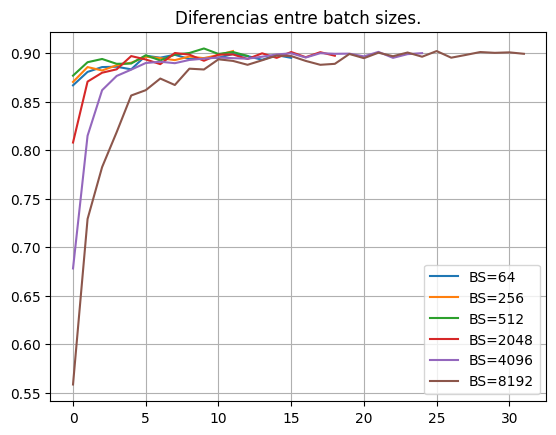

In [ ]:
tabla = [['Max Accuracy',],[' # Iteraciones',]]

for vect in accuracysbs[:5]:
  tabla[0].append(vect.max())
  tabla[1].append(int(np.argmax(vect) + 1))

df = pd.DataFrame(tabla, columns=[' ','64','256','512','2048','8192'])
classes = ['table', 'table-bordered']
tabla_html = df.to_html(index=False, classes=classes)
display(HTML(tabla_html))

for idx,BS in enumerate(batch_sizes) :
  mod =list(filter(lambda x: x !=0, list(accuracysbs[idx])))
  plt.plot(mod, label='BS='+str(BS))
plt.title("Diferencias entre batch sizes.")
plt.legend()
plt.grid()
plt.show()

En esta comparacion se puede apreciar claramente como el BS=512 es la mejor opcion, por lo que se seguira utilizando este valor.

In [ ]:
#Comparacion de optimizadores, con un learning rate de 1e-4 ya que en la comparacion se lo vio con mejores resultados.
  #Modelo 1 : Adam.
modeloopt1 = get_model_mlp_analisis(optimizer = Adam(learning_rate=1e-4)) 
historyopt1 = modeloopt1.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 2 : SGD.
modeloopt2 = get_model_mlp_analisis(optimizer = SGD(learning_rate=1e-4))
historyopt2 = modeloopt2.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 3 : Nadam.
modeloopt3 = get_model_mlp_analisis(optimizer = Nadam(learning_rate=1e-4))
historyopt3 = modeloopt3.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 4 : RMSprop.
modeloopt4 = get_model_mlp_analisis(optimizer = RMSprop(learning_rate=1e-4))
historytop4 = modeloopt4.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)

,Adam,SGD,Nadam,RMSprop
Max Accuracy,0.903667,0.8215,0.9035,0.899333
# Iteraciones,15.000000,200.0000,24.0000,22.000000


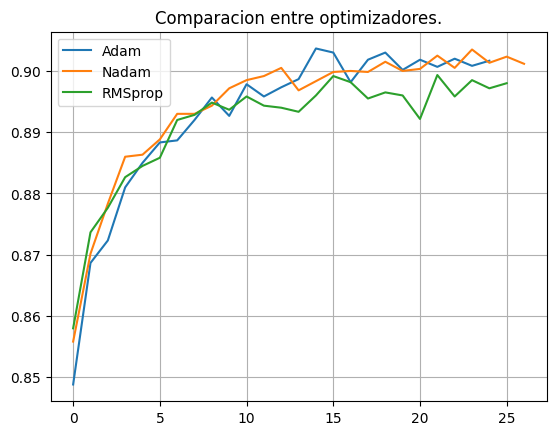

In [ ]:
tabla = [['Max Accuracy',],[' # Iteraciones',]]
epochs = 200
accuracys = np.zeros((4,epochs))

accuracys[0,:] = np.pad(historyopt1.history['val_accuracy'],(0,epochs - len(historyopt1.history['val_accuracy'])),mode='constant')
accuracys[1,:] = np.pad(historyopt2.history['val_accuracy'],(0,epochs - len(historyopt2.history['val_accuracy'])),mode='constant')
accuracys[2,:] = np.pad(historyopt3.history['val_accuracy'],(0,epochs - len(historyopt3.history['val_accuracy'])),mode='constant')
accuracys[3,:] = np.pad(historytop4.history['val_accuracy'],(0,epochs - len(historytop4.history['val_accuracy'])),mode='constant')

for vect in accuracys[:]:
  tabla[0].append(vect.max())
  tabla[1].append(int(np.argmax(vect) + 1))

df = pd.DataFrame(tabla, columns=[' ','Adam','SGD','Nadam','RMSprop'])
classes = ['table', 'table-bordered']
tabla_html = df.to_html(index=False, classes=classes)
display(HTML(tabla_html))

plt.plot(historyopt1.history["val_accuracy"], label="Adam")
##plt.plot(historyopt2.history["val_accuracy"], label="SGD")
plt.plot(historyopt3.history["val_accuracy"], label="Nadam")
plt.plot(historytop4.history["val_accuracy"], label="RMSprop")
plt.title("Comparacion entre optimizadores.")
plt.legend()
plt.grid()
plt.show()

Como vamos, ambos dan resultados parecidos pero el valor maximo de accuracy lo alcanza adam y mas rapido. Por otro lado, no fue grafico SGD, ya que para ese valor de learning rate al ser estatico vemos que tarda 200 epochs y ni siquiere se acerca a los valores de accuracy de los otros tres optimizadores.

In [ ]:
#Comparacion de funciones de activacion.
  #Modelo 1 : Relu.
modeloact1 = get_model_mlp_analisis() 
historyact1 = modeloact1.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 2 : SGD.
modeloact2 = get_model_mlp_analisis(activation = 'tanh')
historyact2 = modeloact2.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 3 : Nadam.
modeloact3 = get_model_mlp_analisis(activation = 'elu')
historyact3 = modeloact3.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 4 : RMSprop.
modeloact4 = get_model_mlp_analisis(activation = 'sigmoid')
historyact4 = modeloact4.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 256, epochs=200,callbacks=[escb,],verbose=0)

,relu,tanh,elu,sigmoid
Max Accuracy,0.903833,0.8975,0.898333,0.898667
# Iteraciones,14.000000,13.0000,6.000000,13.000000


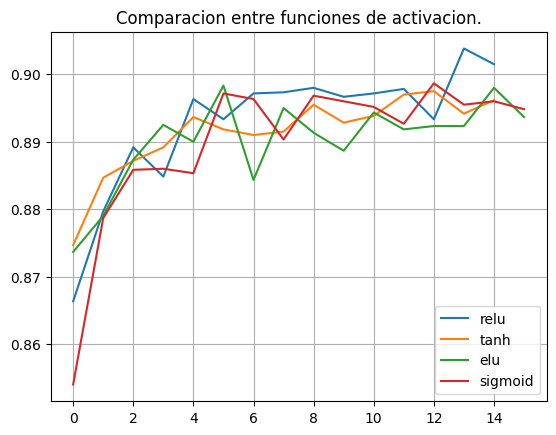

In [ ]:
tabla = [['Max Accuracy',],[' # Iteraciones',]]
epochs = 200
accuracys = np.zeros((4,epochs))

accuracys[0,:] = np.pad(historyact1.history['val_accuracy'],(0,epochs - len(historyact1.history['val_accuracy'])),mode='constant')
accuracys[1,:] = np.pad(historyact2.history['val_accuracy'],(0,epochs - len(historyact2.history['val_accuracy'])),mode='constant')
accuracys[2,:] = np.pad(historyact3.history['val_accuracy'],(0,epochs - len(historyact3.history['val_accuracy'])),mode='constant')
accuracys[3,:] = np.pad(historyact4.history['val_accuracy'],(0,epochs - len(historyact4.history['val_accuracy'])),mode='constant')

for vect in accuracys[:]:
  tabla[0].append(vect.max())
  tabla[1].append(int(np.argmax(vect) + 1))

df = pd.DataFrame(tabla, columns=[' ','relu','tanh','elu','sigmoid'])
classes = ['table', 'table-bordered']
tabla_html = df.to_html(index=False, classes=classes)
display(HTML(tabla_html))

plt.plot(historyact1.history["val_accuracy"], label="relu")
plt.plot(historyact2.history["val_accuracy"], label="tanh")
plt.plot(historyact3.history["val_accuracy"], label="elu")
plt.plot(historyact4.history["val_accuracy"], label="sigmoid")
plt.title("Comparacion entre funciones de activacion.")
plt.legend()
plt.grid()
plt.show()

Confirmando lo visto en clase, utilizando relu como funcion de activacion vemos el mejor resultado y muy similar al resto en cuando a numero de iteraciones para lograrlo.

In [ ]:
#Comparacion de inicializacion de pesos.
  #Modelo 1 : 
modeloki1 = get_model_mlp_analisis(initializer='zeros') 
historyki1 = modeloki1.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 2 : 
modeloki2 = get_model_mlp_analisis(initializer='glorot_uniform')
historyki2 = modeloki2.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 3 : 
modeloki3 = get_model_mlp_analisis(initializer='glorot_normal')
historyki3 = modeloki3.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 4 : 
modeloki4 = get_model_mlp_analisis(initializer='normal')
historyki4 = modeloki4.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)

,zeros,gl_uniform,gl_normal,normal
Max Accuracy,0.097333,0.9015,0.9035,0.900667
# Iteraciones,5.000000,14.0000,12.0000,10.000000


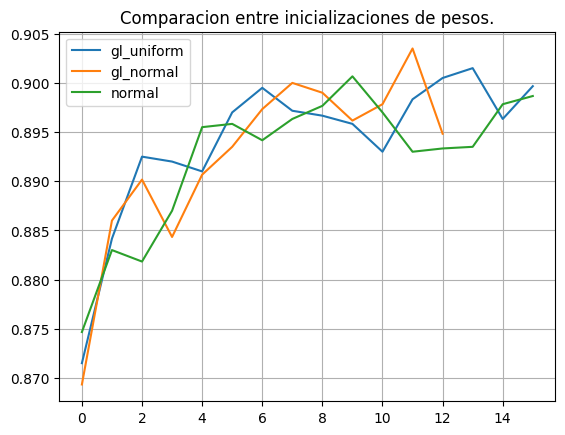

In [ ]:
tabla = [['Max Accuracy',],[' # Iteraciones',]]
epochs = 200
accuracys = np.zeros((4,epochs))

accuracys[0,:] = np.pad(historyki1.history['val_accuracy'],(0,epochs - len(historyki1.history['val_accuracy'])),mode='constant')
accuracys[1,:] = np.pad(historyki2.history['val_accuracy'],(0,epochs - len(historyki2.history['val_accuracy'])),mode='constant')
accuracys[2,:] = np.pad(historyki3.history['val_accuracy'],(0,epochs - len(historyki3.history['val_accuracy'])),mode='constant')
accuracys[3,:] = np.pad(historyki4.history['val_accuracy'],(0,epochs - len(historyki4.history['val_accuracy'])),mode='constant')

for vect in accuracys[:]:
  tabla[0].append(vect.max())
  tabla[1].append(int(np.argmax(vect) + 1))

df = pd.DataFrame(tabla, columns=[' ','zeros','gl_uniform','gl_normal','normal'])
classes = ['table', 'table-bordered']
tabla_html = df.to_html(index=False, classes=classes)
display(HTML(tabla_html))

##plt.plot(historyki1.history["val_accuracy"], label="zeros")
plt.plot(historyki2.history["val_accuracy"], label="gl_uniform")
plt.plot(historyki3.history["val_accuracy"], label="gl_normal")
plt.plot(historyki4.history["val_accuracy"], label="normal")
plt.title("Comparacion entre inicializaciones de pesos.")
plt.legend()
plt.grid()
plt.show()

En esta comparacion podemos notar que zeros es el peor inicializador ya que es demasiado lento, e inlcuso es dificil que salga de ese estado y logre entrenar. Solo llego a un 0.1 de accuracy y corto por el earlu stopping el cual tenia un patience de 20.
Por otro lado vemos una diferencia respecto a lo que pensabamos ya que por default en la capa densa, el inicializador es glorot_uniform pero en este caso glorot_normal performo mejor y mas rapido. 
Igualmente se continua utilizando glorot_uniform, ya que los resultados son similares y el modelo entreno pocos epochs en ambos casos ya que cortaron por el early stopping.

In [ ]:
#Comparacion de dropout.
  #Modelo 1 : sin dropout.
modelodo1 = get_model_mlp_analisis() 
historydo1 = modelodo1.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 2 : dropout = 0.1 .
modelodo2 = get_model_mlp_analisis(dropout = 0.1)
historydo2 = modelodo2.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 3 : dropout = 0.1 .
modelodo3 = get_model_mlp_analisis(dropout = 0.2)
historydo3 = modelodo3.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)
  #Modelo 4 : dropout = 0.1 .
modelodo4 = get_model_mlp_analisis(dropout = 0.4)
historydo4 = modelodo4.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)

,0,0.1,0.2,0.4
Max Accuracy,0.904167,0.903833,0.906667,0.909667
# Iteraciones,11.000000,14.000000,18.000000,23.000000


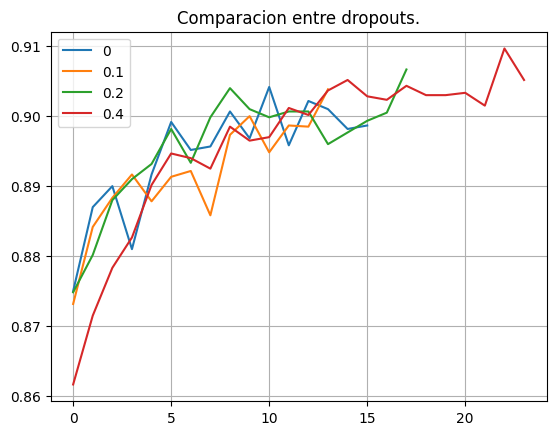

In [ ]:
tabla = [['Max Accuracy',],[' # Iteraciones',]]
epochs = 200
accuracys = np.zeros((4,epochs))

accuracys[0,:] = np.pad(historydo1.history['val_accuracy'],(0,epochs - len(historydo1.history['val_accuracy'])),mode='constant')
accuracys[1,:] = np.pad(historydo2.history['val_accuracy'],(0,epochs - len(historydo2.history['val_accuracy'])),mode='constant')
accuracys[2,:] = np.pad(historydo3.history['val_accuracy'],(0,epochs - len(historydo3.history['val_accuracy'])),mode='constant')
accuracys[3,:] = np.pad(historydo4.history['val_accuracy'],(0,epochs - len(historydo4.history['val_accuracy'])),mode='constant')

for vect in accuracys[:]:
  tabla[0].append(vect.max())
  tabla[1].append(int(np.argmax(vect) + 1))

df = pd.DataFrame(tabla, columns=[' ','0','0.1','0.2','0.4'])
classes = ['table', 'table-bordered']
tabla_html = df.to_html(index=False, classes=classes)
display(HTML(tabla_html))

plt.plot(historydo1.history["val_accuracy"], label="0")
plt.plot(historydo2.history["val_accuracy"], label="0.1")
plt.plot(historydo3.history["val_accuracy"], label="0.2")
plt.plot(historydo4.history["val_accuracy"], label="0.4")
plt.title("Comparacion entre dropouts.")
plt.legend()
plt.grid()
plt.show()

Se puede apreciar que a mayor dropout rate se vieron mejores resultados, pero tambien es evidente que la red tomo mas epochs para poder llegar a ese valor de accuracy mayor.

### La "mejor" red

A partir de los analisis hechos, vamos a generar la mejor red posible y calcular sus metricas de interes.

In [ ]:
modelo_final = get_model_mlp_analisis(dropout = 0.4,initializer = 'glorot_uniform',optimizer = Adam(learning_rate=1e-4)) 
history_final = modelo_final.fit(x= X_train_shuff, y = Y_train_shuff,validation_data=(X_val,Y_val), batch_size = 512, epochs=200,callbacks=[escb,],verbose=0)

,validation,train
Max Accuracy,0.908,0.93712
# Iteraciones,43.000,51.00000


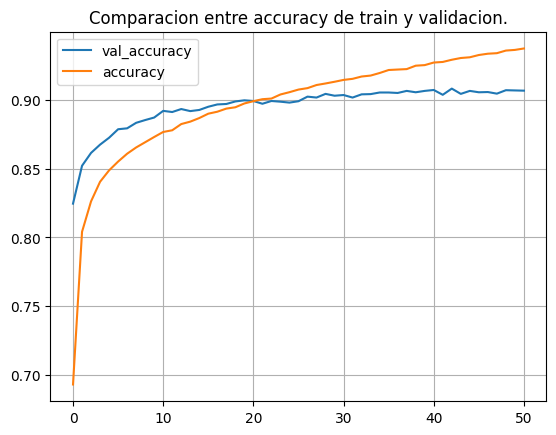

In [ ]:
#Graficamos el accuracy entre utilizar o no Batch normalization.
tabla = [['Max Accuracy',],[' # Iteraciones',]]
epochs = 200
accuracys = np.zeros((2,epochs))

accuracys[0,:] = np.pad(history_final.history['val_accuracy'],(0,epochs - len(history_final.history['val_accuracy'])),mode='constant')
accuracys[1,:] = np.pad(history_final.history['accuracy'],(0,epochs - len(history_final.history['accuracy'])),mode='constant')

for vect in accuracys[:]:
  tabla[0].append(vect.max())
  tabla[1].append(int(np.argmax(vect) + 1))

df = pd.DataFrame(tabla, columns=[' ','validation','train'])
classes = ['table', 'table-bordered']
tabla_html = df.to_html(index=False, classes=classes)
display(HTML(tabla_html))

val_acc1 = history_final.history["val_accuracy"]
val_acc3 = history_final.history["accuracy"]

plt.plot(val_acc1, label="val_accuracy")
plt.plot(val_acc3, label="accuracy")
plt.title("Comparacion entre accuracy de train y validacion.")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

pred_train = modelo_final.predict(X_train)
pred_val= modelo_final.predict(X_val)

# AREA BAJO LA CURVA ROC
print(" El area bajo la curva ROC para train es de ")
print(roc_auc_score(Y_train, pred_train, average='macro',multi_class='ovr'))
print(" El area bajo la curva ROC para validacion es de ")
print( roc_auc_score(Y_val, pred_val, average='macro',multi_class='ovr'))


188/188 [==============================] - 0s 2ms/step
 El area bajo la curva ROC para train es de 
0.9988206628337434
 El area bajo la curva ROC para validacion es de 
0.9944582099262839


<ipython-input-60-9a9cde03b1d4>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


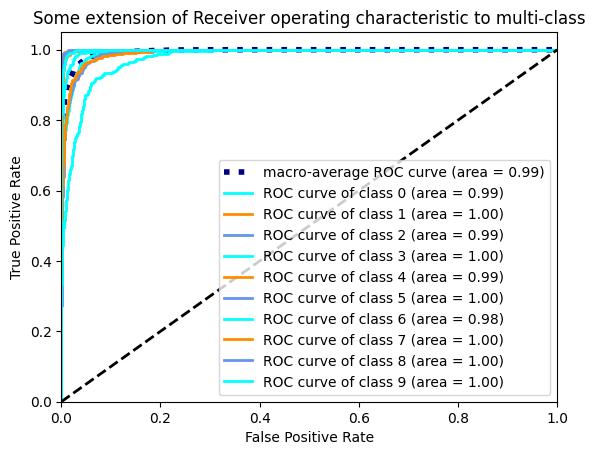

In [ ]:
# CURVA ROC ( TOMADO DEL MATERIAL DE LA CATEDRA)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = Y_val.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], pred_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), pred_val.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


from matplotlib import pyplot as plt
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import tensorflow as tf
metric = tf.keras.metrics.Precision(thresholds=0.5)
metric.update_state(Y_val, pred_val)
presicion = metric.result()
print("precision : " + str(presicion.numpy()))

metric = tf.keras.metrics.Recall(thresholds=0.5)
metric.update_state(Y_val, pred_val)
recall = metric.result()
print("recall : " + str(recall.numpy()))

f1_Score=(2*(presicion*recall))/(presicion+recall)
print("f1 score: " + str(f1_Score.numpy()))


precision : 0.91645443
recall : 0.8995
f1 score: 0.90789807


## Modelo con capa de salida con dos neuronas

In [12]:
from tensorflow.keras.models import Model

In [13]:

model_2n =  Sequential()
model_2n.add(Flatten(input_shape=(28,28)))
model_2n.add(Dense(1024, activation='relu', kernel_initializer = 'glorot_uniform',name='middle1'))
model_2n.add(Dense(200, activation='relu', kernel_initializer = 'glorot_uniform',name='middle2'))
model_2n.add(Dense(2, activation='linear', kernel_initializer = 'glorot_uniform',name='middle3'))

model_2n.add(Dense(10, activation="softmax",name='salida'))
model_2n.summary()
model_2n.compile(loss = 'categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'] )

escb = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 middle1 (Dense)             (None, 1024)              803840    
                                                                 
 middle2 (Dense)             (None, 200)               205000    
                                                                 
 middle3 (Dense)             (None, 2)                 402       
                                                                 
 salida (Dense)              (None, 10)                30        
                                                                 
Total params: 1,009,272
Trainable params: 1,009,272
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_2n.fit(X_train_shuff, 
          Y_train_shuff ,
          epochs=200, batch_size=512,
          verbose=0,
          validation_data=(X_val, Y_val), 
          callbacks=[escb],
         )

In [17]:
model_trunc = Model(model_2n.input, model_2n.layers[-2].output)
model_trunc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (InputLayer)  [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 middle1 (Dense)             (None, 1024)              803840    
                                                                 
 middle2 (Dense)             (None, 200)               205000    
                                                                 
 middle3 (Dense)             (None, 2)                 402       
                                                                 
Total params: 1,009,242
Trainable params: 1,009,242
Non-trainable params: 0
_________________________________________________________________


In [18]:
predictions = model_trunc.predict(np.vstack([X_train_shuff, X_val]), verbose=1)
maxs = np.max(predictions, axis=0)
mins = np.min(predictions, axis=0)
print(maxs, mins)

3563/3563 [==============================] - 13s 4ms/step
[ 329.02957 1222.5898 ] [-2317.9963   -232.70241]


In [19]:
predictions_train = model_trunc.predict(X_train_shuff, verbose=1)

3375/3375 [==============================] - 12s 4ms/step


In [21]:
# Calculo de entorno
N = 500
x1, x2 = np.meshgrid(np.linspace(mins[0], maxs[0], N), np.linspace(mins[1], maxs[1], N))
x_mesh = np.c_[x1.ravel(), x2.ravel()]
model_last_trunc = Sequential()
model_last_trunc.add(Dense(10, input_shape=(2,)))
model_last_trunc.set_weights(model_2n.get_layer('salida').get_weights())
pred_mesh = model_last_trunc.predict(x_mesh, verbose=1)
Z = np.argmax(pred_mesh, axis=1).reshape(x1.shape)/10

7813/7813 [==============================] - 10s 1ms/step


188/188 [==============================] - 1s 5ms/step


<ipython-input-42-0591b02a16a0>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(class_predictions[:, 0], class_predictions[:, 1], c=colors[i], s=5, alpha=1, label=str(i))


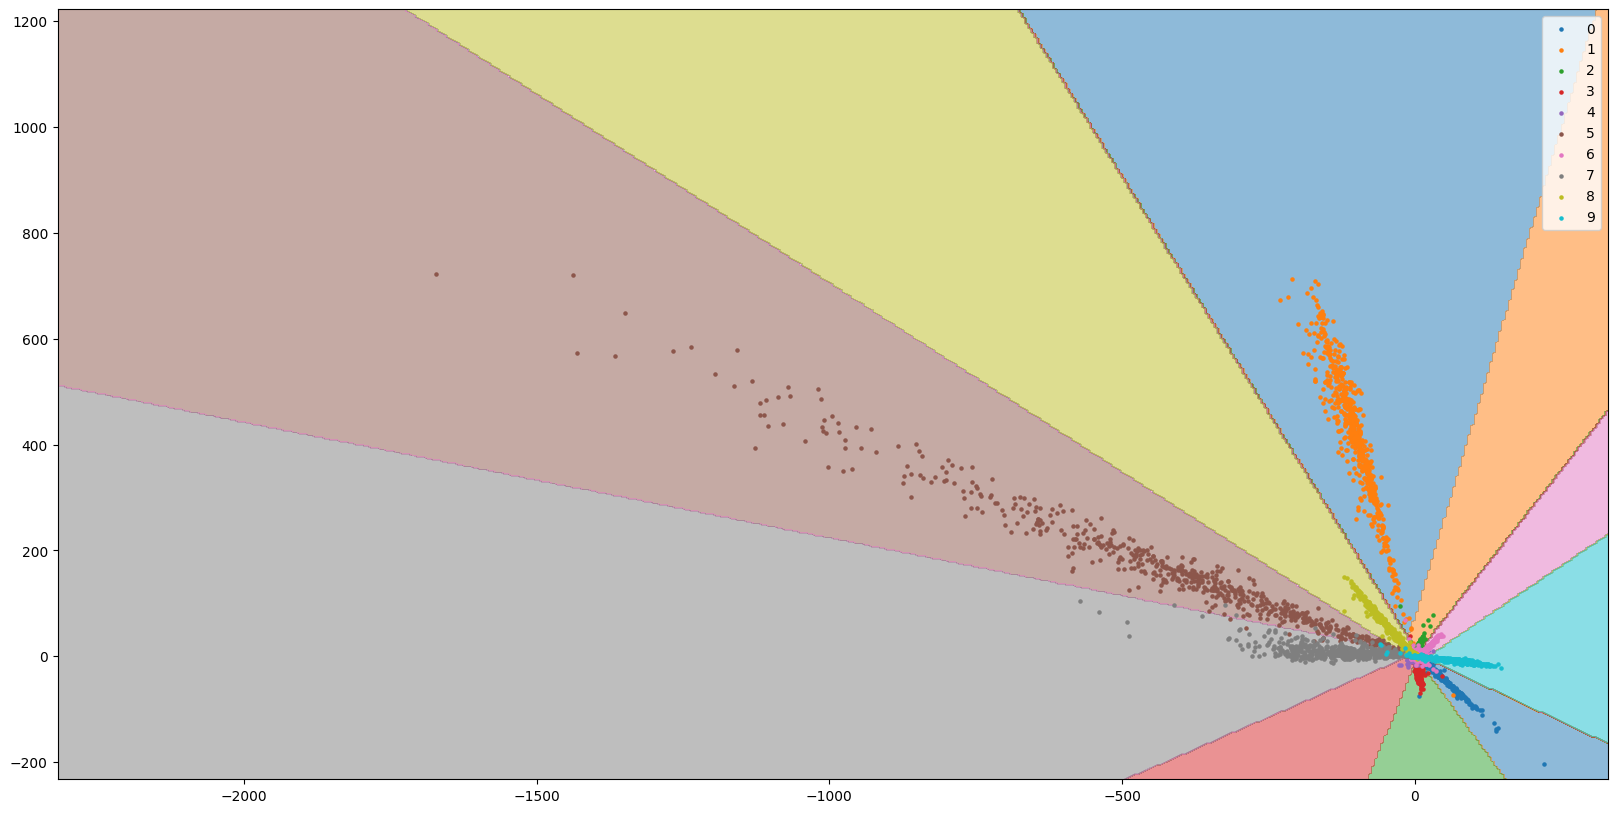

In [42]:
predictions_val = model_trunc.predict(X_val, verbose=1)

plt.figure(figsize=(20, 10))

# Adjust the number of contour levels
plt.contourf(x1, x2, Z, 10, cmap=plt.cm.tab10, alpha=0.5)

colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i in range(10):
    class_indices = np.argmax(Y_val, axis=1) == i
    class_predictions = predictions_val[class_indices]
    if len(class_predictions) > 0:
        plt.scatter(class_predictions[:, 0], class_predictions[:, 1], c=colors[i], s=5, alpha=1, label=str(i))

plt.legend()
plt.show()

Nota: extraido de la catedra archivo 05-MNIST